In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(454, 687, 3)


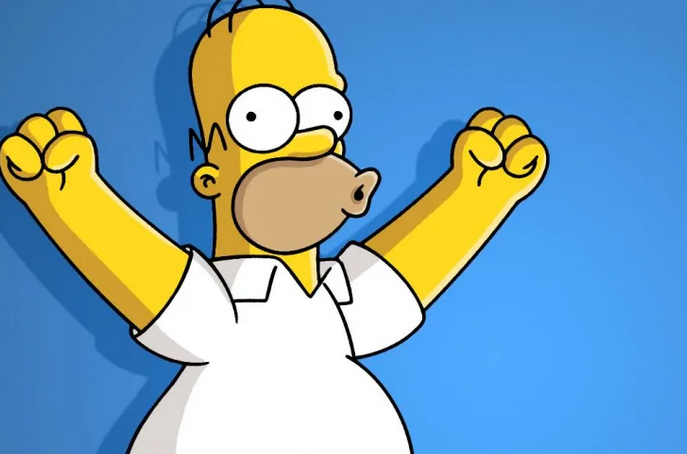

In [147]:
images = ["marilyn-monroe.png", "simpsons.png", "spiderman.jpg"]
index = 1
image = cv2.imread(images[index])
print(image.shape)
cv2_imshow(image)

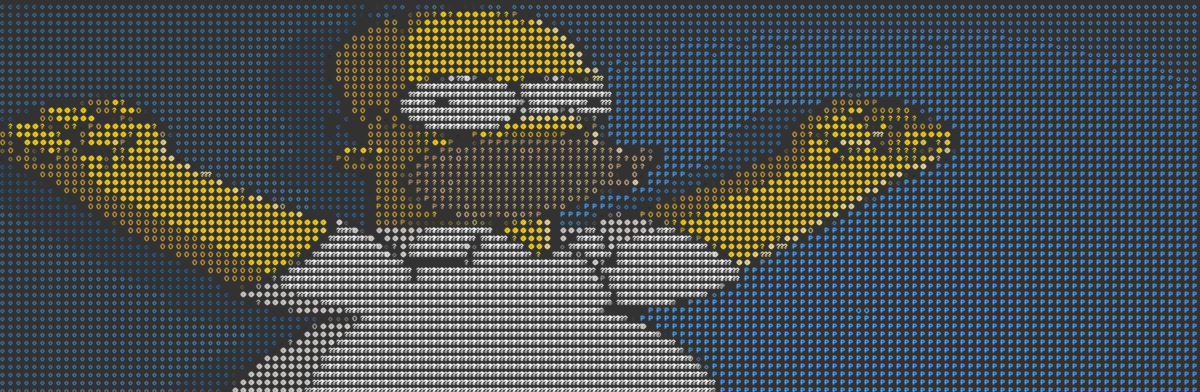

In [149]:
def img2ascii(image_path, output_width=100, save=False, output_path="ascii_art.jpg", original_colors = True):
    image = cv2.imread(image_path)

    ASCII_CHARS = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,^`'."[::-1]
    ASCII_CHARS = "■@%#*+=-:. "[::-1]
    ASCII_CHARS = "■@?OPoc:. "[::-1] # opencv doesnt put ■

    # Resize the image based on the desired output width
    height, width, _ = image.shape
    aspect_ratio = height / width
    new_height = int(output_width * aspect_ratio * 0.5)
    resized_image = cv2.resize(image, (output_width, new_height))

    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    font_scale = 0.2
    font_thickness = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    character_width = character_height = 8  # estimated width of each ASCII character
    # character_height = int(character_width * aspect_ratio) # estimated height of each ASCII character
    ascii_image_width = character_width * output_width
    ascii_image_height = character_height * new_height
    ascii_image = np.ones((ascii_image_height, ascii_image_width, 3), dtype=np.uint8) * 50

    # Draw ASCII characters with color onto the canvas


    for y in range(new_height):
        for x in range(output_width):
            pixel_gray = gray_image[y, x]
            ascii_char = ASCII_CHARS[int(pixel_gray / 256 * len(ASCII_CHARS))]

            color = resized_image[y, x] if original_colors else (255,255,255)

            pos_x = x * character_width
            pos_y = y * character_height + character_height

            cv2.putText(
                ascii_image,
                ascii_char,
                (pos_x, pos_y),
                font,
                font_scale,
                (int(color[0]), int(color[1]), int(color[2])),
                font_thickness,
                lineType=cv2.LINE_AA
            )
    cv2_imshow(ascii_image)

    if save:
        cv2.imwrite(output_path, ascii_image)
        print(f"ASCII art image saved to {output_path}")

# I want to get edges of the image and use sobel filter to get the gradients of it, and use the gradients to plot edges as ascii_chars of special chars.


img2ascii(images[1],
          output_width=150,
          output_path="ascii_art.jpg",
          save = False,
          original_colors=True)


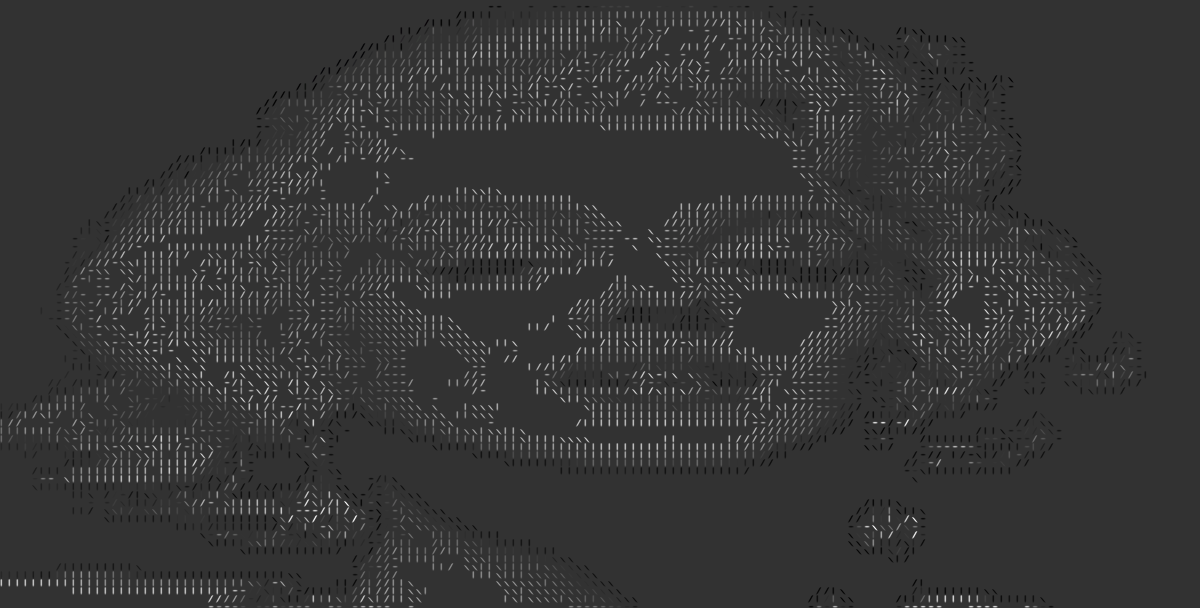

In [154]:
def img2ascii_edges(image_path, output_width=100, save=False, output_path="ascii_art.jpg", original_colors=True):
    image = cv2.imread(image_path)

    ASCII_CHARS = {
        'horizontal': '-',
        'vertical': '|',
        'diagonal': '/',
        'anti-diagonal': '\\',
        'no_edge': ' '
    }

    # Resize the image based on the desired output width
    height, width, _ = image.shape
    aspect_ratio = height / width
    new_height = int(output_width * aspect_ratio * 0.5)
    resized_image = cv2.resize(image, (output_width, new_height))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter to get gradients
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    angle = np.arctan2(sobely, sobelx) * (180 / np.pi)  # Angle of edges

    # Set up output image
    font_scale = 0.2
    font_thickness = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    character_width = character_height = 8
    ascii_image_width = character_width * output_width
    ascii_image_height = character_height * new_height
    ascii_image = np.ones((ascii_image_height, ascii_image_width, 3), dtype=np.uint8) * 50

    # Draw ASCII characters based on edge direction
    for y in range(new_height):
        for x in range(output_width):
            mag = magnitude[y, x]
            ang = angle[y, x]

            # Choose character based on direction and magnitude of gradient
            if mag > 50:  # Threshold for edge strength
                if -22.5 <= ang <= 22.5 or ang >= 157.5 or ang <= -157.5:
                    ascii_char = ASCII_CHARS['horizontal']
                elif 67.5 <= ang <= 112.5 or -112.5 <= ang <= -67.5:
                    ascii_char = ASCII_CHARS['vertical']
                elif 22.5 < ang < 67.5 or -157.5 < ang < -112.5:
                    ascii_char = ASCII_CHARS['diagonal']
                else:
                    ascii_char = ASCII_CHARS['anti-diagonal']
            else:
                ascii_char = ASCII_CHARS['no_edge']

            # Set character color based on original image
            color = resized_image[y, x] if original_colors else (255, 255, 255)

            pos_x = x * character_width
            pos_y = y * character_height + character_height

            cv2.putText(
                ascii_image,
                ascii_char,
                (pos_x, pos_y),
                font,
                font_scale,
                (int(color[0]), int(color[1]), int(color[2])),
                font_thickness,
                lineType=cv2.LINE_AA
            )

    cv2_imshow(ascii_image)

    if save:
        cv2.imwrite(output_path, ascii_image)
        print(f"ASCII art image saved to {output_path}")

# Usage example:
img2ascii(images[0],
          output_width=150,
          output_path="ascii_art.jpg",
          save = False,
          original_colors=True)
